In [39]:
import os
from glob import glob

import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from numpy import fft

### Load in Data

In [2]:
# Loads a dataset from a subdirectory.
def load_dataset(datapath):
    df = pd.DataFrame( )
    
    for folder in os.listdir(datapath):
        files = glob(pathname= str(datapath + folder + '/*.jpg'))
        df = pd.concat( [ df, pd.DataFrame( { 'filename': files , 
                                              'category': folder } ) ] )
    
    df = df.sort_values(by="category", ignore_index=True)    
       
    return df

In [3]:
train_path = 'seg_train/seg_train/'

training_set = load_dataset(train_path)

### Split Training Data into Train/Val

In [6]:
#Split train set into train/validation (80/20), seed =3.14, random num generator
def train_val_split(training_set):
    '''Split a training set further into 80/20 train/validation subdatasets'''
    train, val = train_test_split(training_set, test_size=0.2, random_state = 314)
    return train, val

In [25]:
train, val = train_val_split(training_set)

In [28]:
def sanity_check_split(train, val):
    print("New training df size: ", train.shape)
    print("New validation df size: ", val.shape)
    print("\n")
    train_class = train.groupby(['category']).count()/train.shape[0]
    val_class = val.groupby(['category']).count()/val.shape[0]
    print("New training class distribution: ", "\n", train_class)
    print("New validation class distribution: ", "\n", val_class)
    pass

In [29]:
sanity_check_split(train, val)

New training df size:  (11227, 2)
New validation df size:  (2807, 2)


New training class distribution:  
            filename
category           
buildings  0.155162
forest     0.163445
glacier    0.171194
mountain   0.177875
sea        0.161842
street     0.170482
New validation class distribution:  
            filename
category           
buildings  0.159957
forest     0.155326
glacier    0.171714
mountain   0.183470
sea        0.162807
street     0.166726


### Apply Features to Validation

In [173]:
def test_feature(validation_set, feature):
    ''' Function to apply a feature to the validation set 
    and spit out error values (confusion matrix, precision, recall, F1 score, accuracy) '''
    pass

### Fourier Transform Filter

In [184]:
def fourier_transform_3_examples(input_images):
    fig, ax = plt.subplots(3, 2, figsize=(15, 15))
    ax_row = 0
    ax_col = 0
    
    for idx, row in input_images.iterrows():
        img = plt.imread(row['filename'])
        img_gray = img.mean(axis=2) #make the image grayscale by averaging all 3 channels
        fourier = fft.fftshift(fft.fft2(img_gray))
        Fmag = np.abs(fourier)
        
        #plot the original and fourier images side-by-side
        ax[ax_row][ax_col].imshow(img)
        ax[ax_row][ax_col].set_title("original image of " + str(row['category']))
        ax[ax_row][ax_col].axis("off")
        ax_col += 1
        ax[ax_row][ax_col].imshow(np.log(Fmag), cmap='gray')
        ax[ax_row][ax_col].set_title("fourier transform of " + str(row['category']))
        ax[ax_row][ax_col].axis("off")
        ax_row += 1
        ax_col = 0
    pass

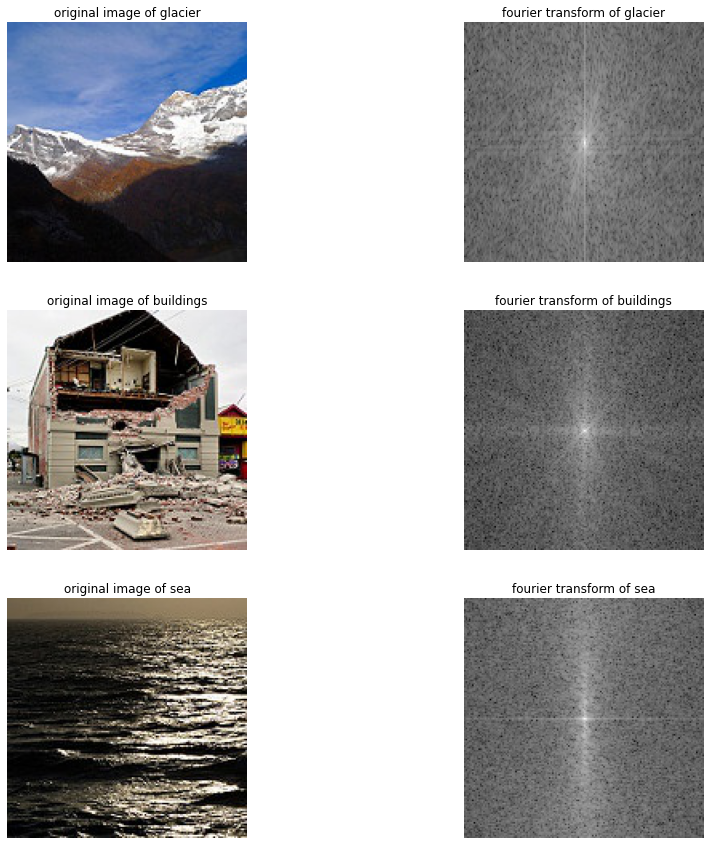

In [185]:
# fourier_transform_3_examples(train.sample(n=3))
fourier_transform_3_examples(train.iloc[:3,])

In [180]:
def fourier_transform_3_examples_V2(input_images):
    fig, ax = plt.subplots(3, 2, figsize=(15, 15))
    ax_row = 0
    ax_col = 0
    
    for idx, row in input_images.iterrows():
        img = plt.imread(row['filename'])
        ydim = img.shape[0]
        xdim = img.shape[1]
        img_gray = img.mean(axis=2) #make the image grayscale by averaging all 3 channels
        win = np.outer(np.hanning(ydim), np.hanning(xdim))
        win = win/np.mean(win)
        fourier = fft.fftshift(fft.fft2(img_gray*win))
        Fmag = np.abs(fourier)
        
        #plot the original and fourier images side-by-side
        ax[ax_row][ax_col].imshow(img)
        ax[ax_row][ax_col].set_title("original image of " + str(row['category']))
        ax[ax_row][ax_col].axis("off")
        ax_col += 1
        ax[ax_row][ax_col].imshow(np.log(Fmag), cmap='gray')
        ax[ax_row][ax_col].set_title("fourier transform of " + str(row['category']))
        ax[ax_row][ax_col].axis("off")
        ax_row += 1
        ax_col = 0
    pass

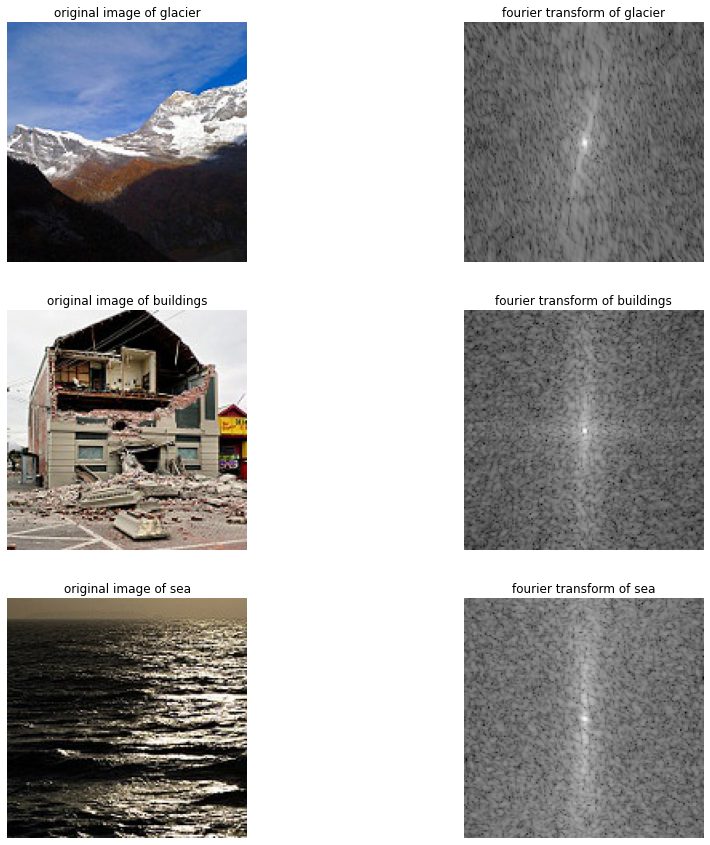

In [186]:
# fourier_transform_3_examples_V2(train.sample(n=3))
fourier_transform_3_examples_V2(train.iloc[:3,])